In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

/Users/davies/Library/Python/3.6/lib/python/site-packages/lightkurve/periodogram.py:752: LightkurveWarning: Input light curve will be normalized.
  LightkurveWarning)


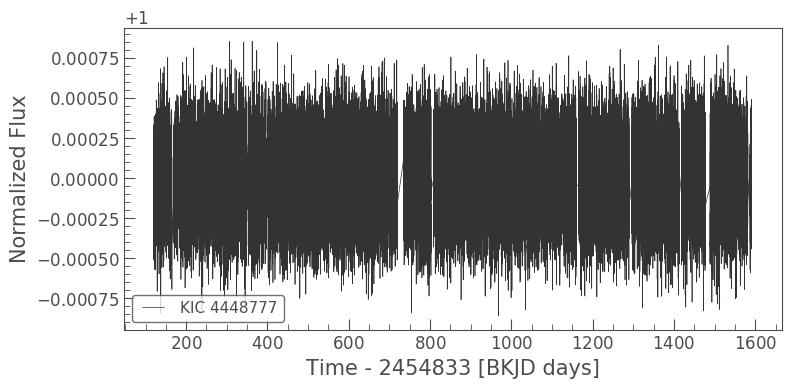

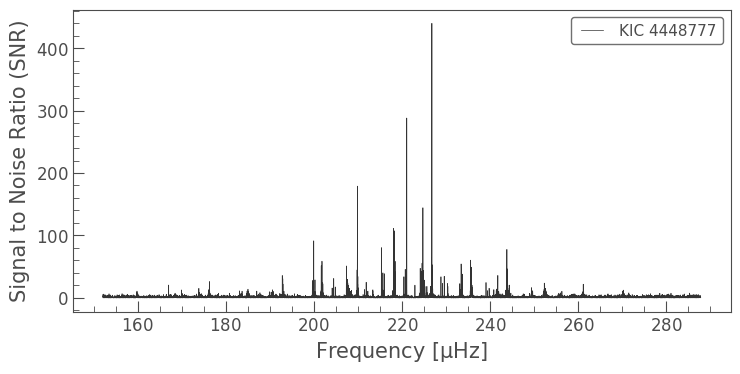

In [3]:
lcs = lk.search_lightcurvefile(kic).download_all()
lc = lcs.PDCSAP_FLUX.stitch().normalize().flatten(window_length=401).remove_outliers(4)
lc.plot()
pg = lc.to_periodogram(normalization='psd', minimum_frequency=numax[0] - dnu[0]*4, 
                       maximum_frequency=numax[0] + dnu[0]*4).flatten()
pg.plot()

In [4]:
star = pb.star(kic, pg, 
               numax, dnu, teff, bp_rp, 
               store_chains=True, 
               nthreads=4, make_plots=True)

 10%|█         | 2000/20000 [02:25<21:47, 13.77it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:32<00:00, 86.12draws/s] 
The acceptance probability does not match the target. It is 0.8397157161657303, but should be close to 0.9. Try to increase the number of tuning steps.


CPU times: user 4min 48s, sys: 8.34 s, total: 4min 56s
Wall time: 6min 26s


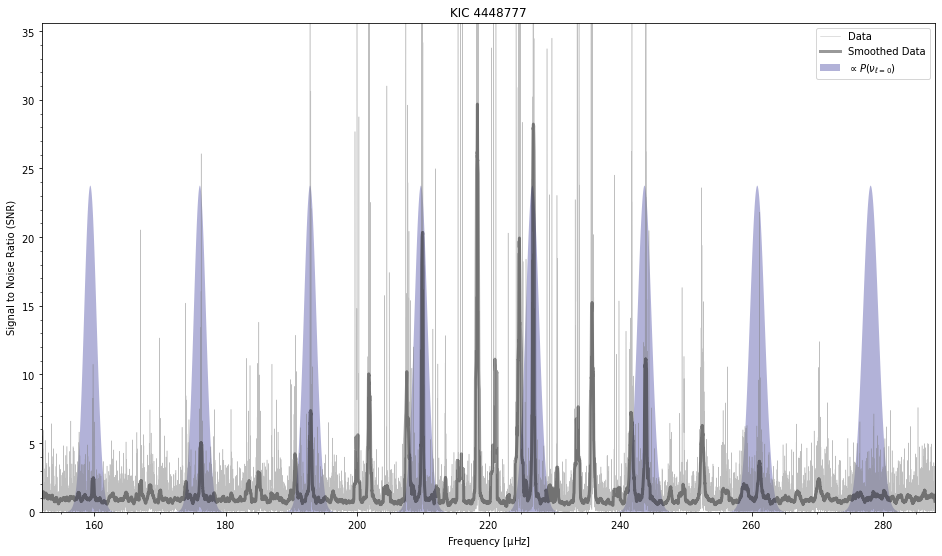

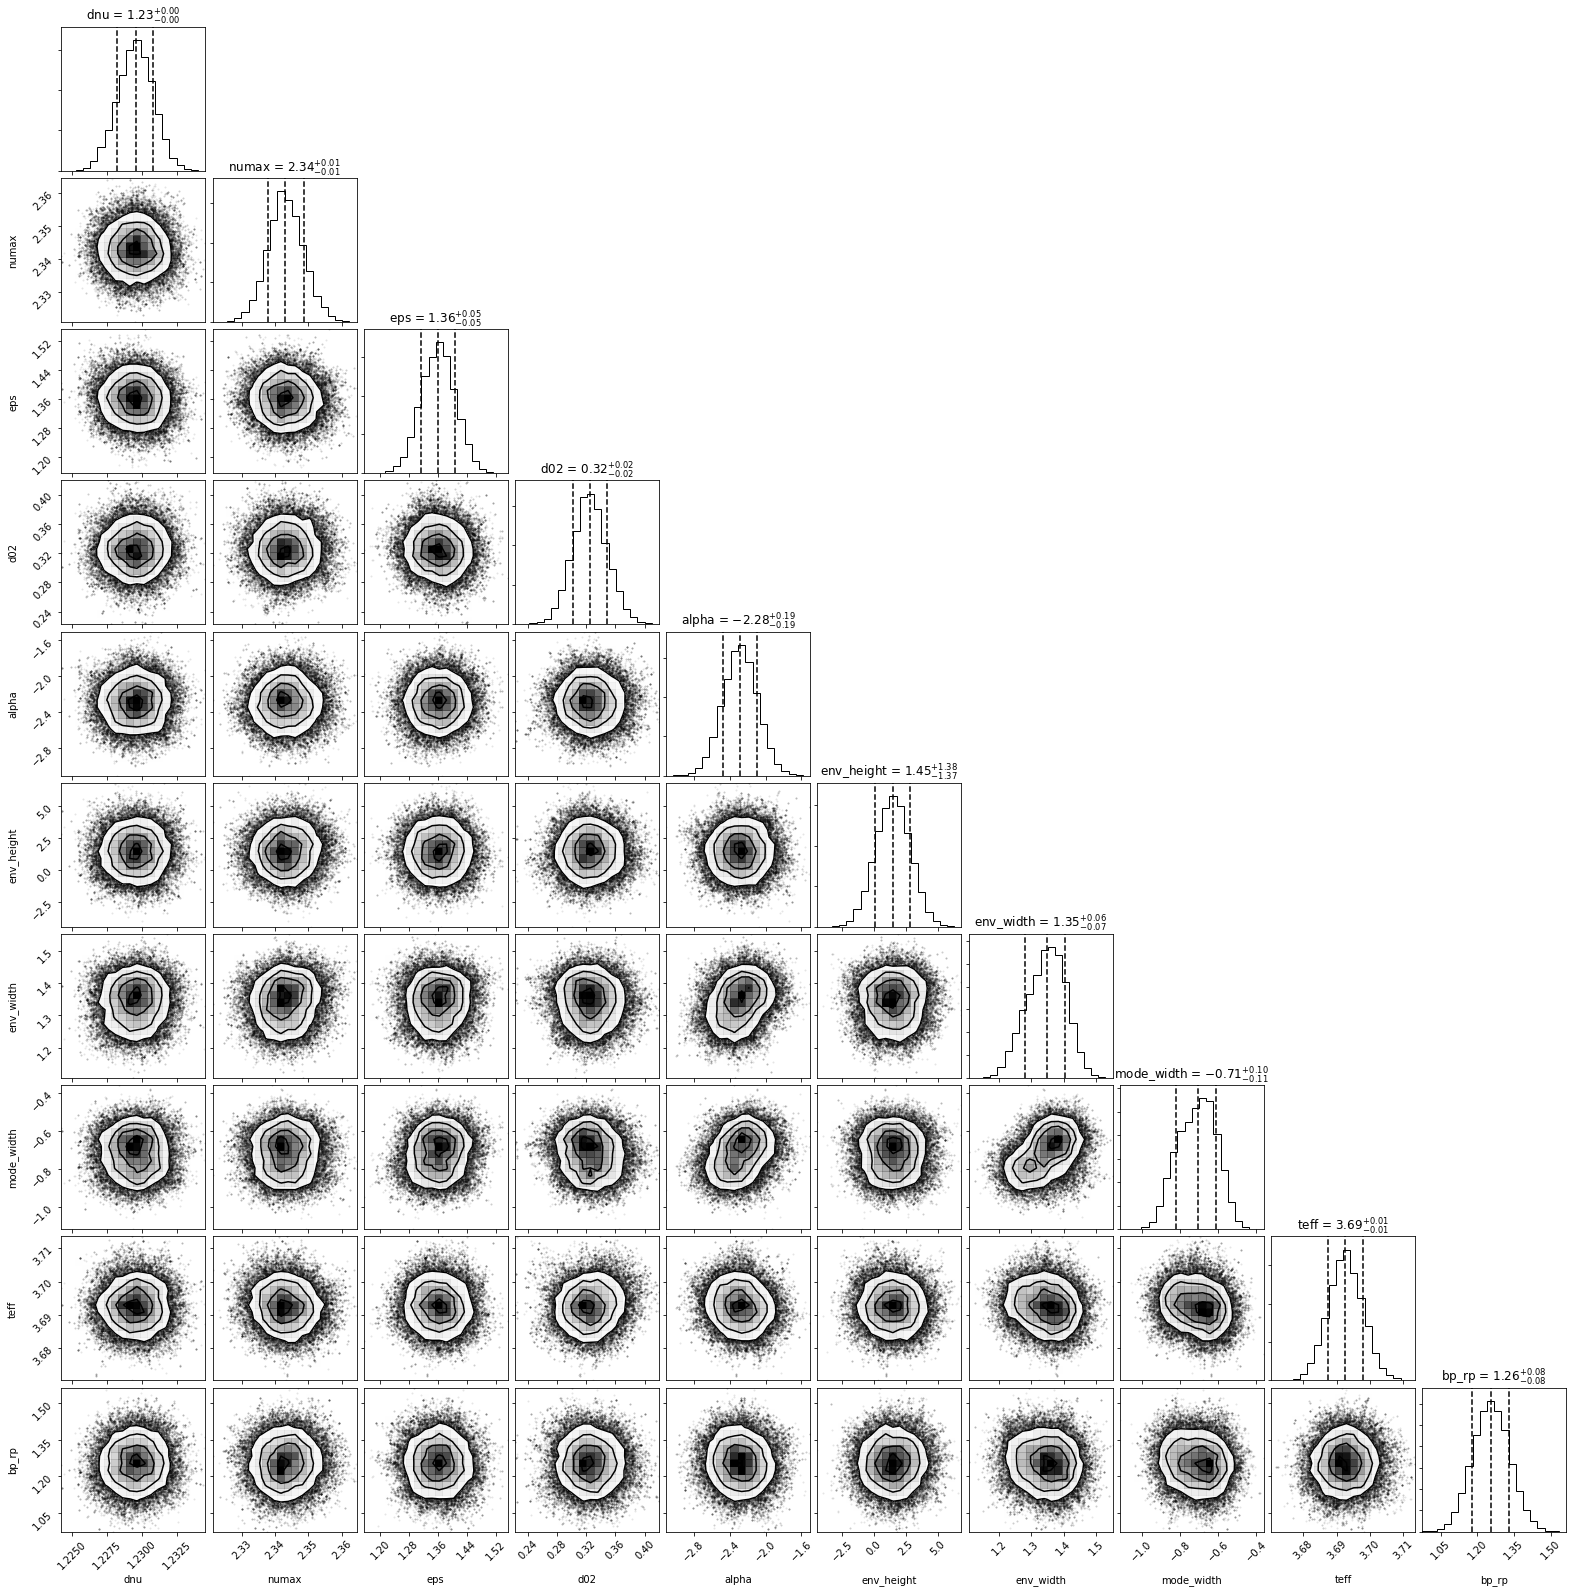

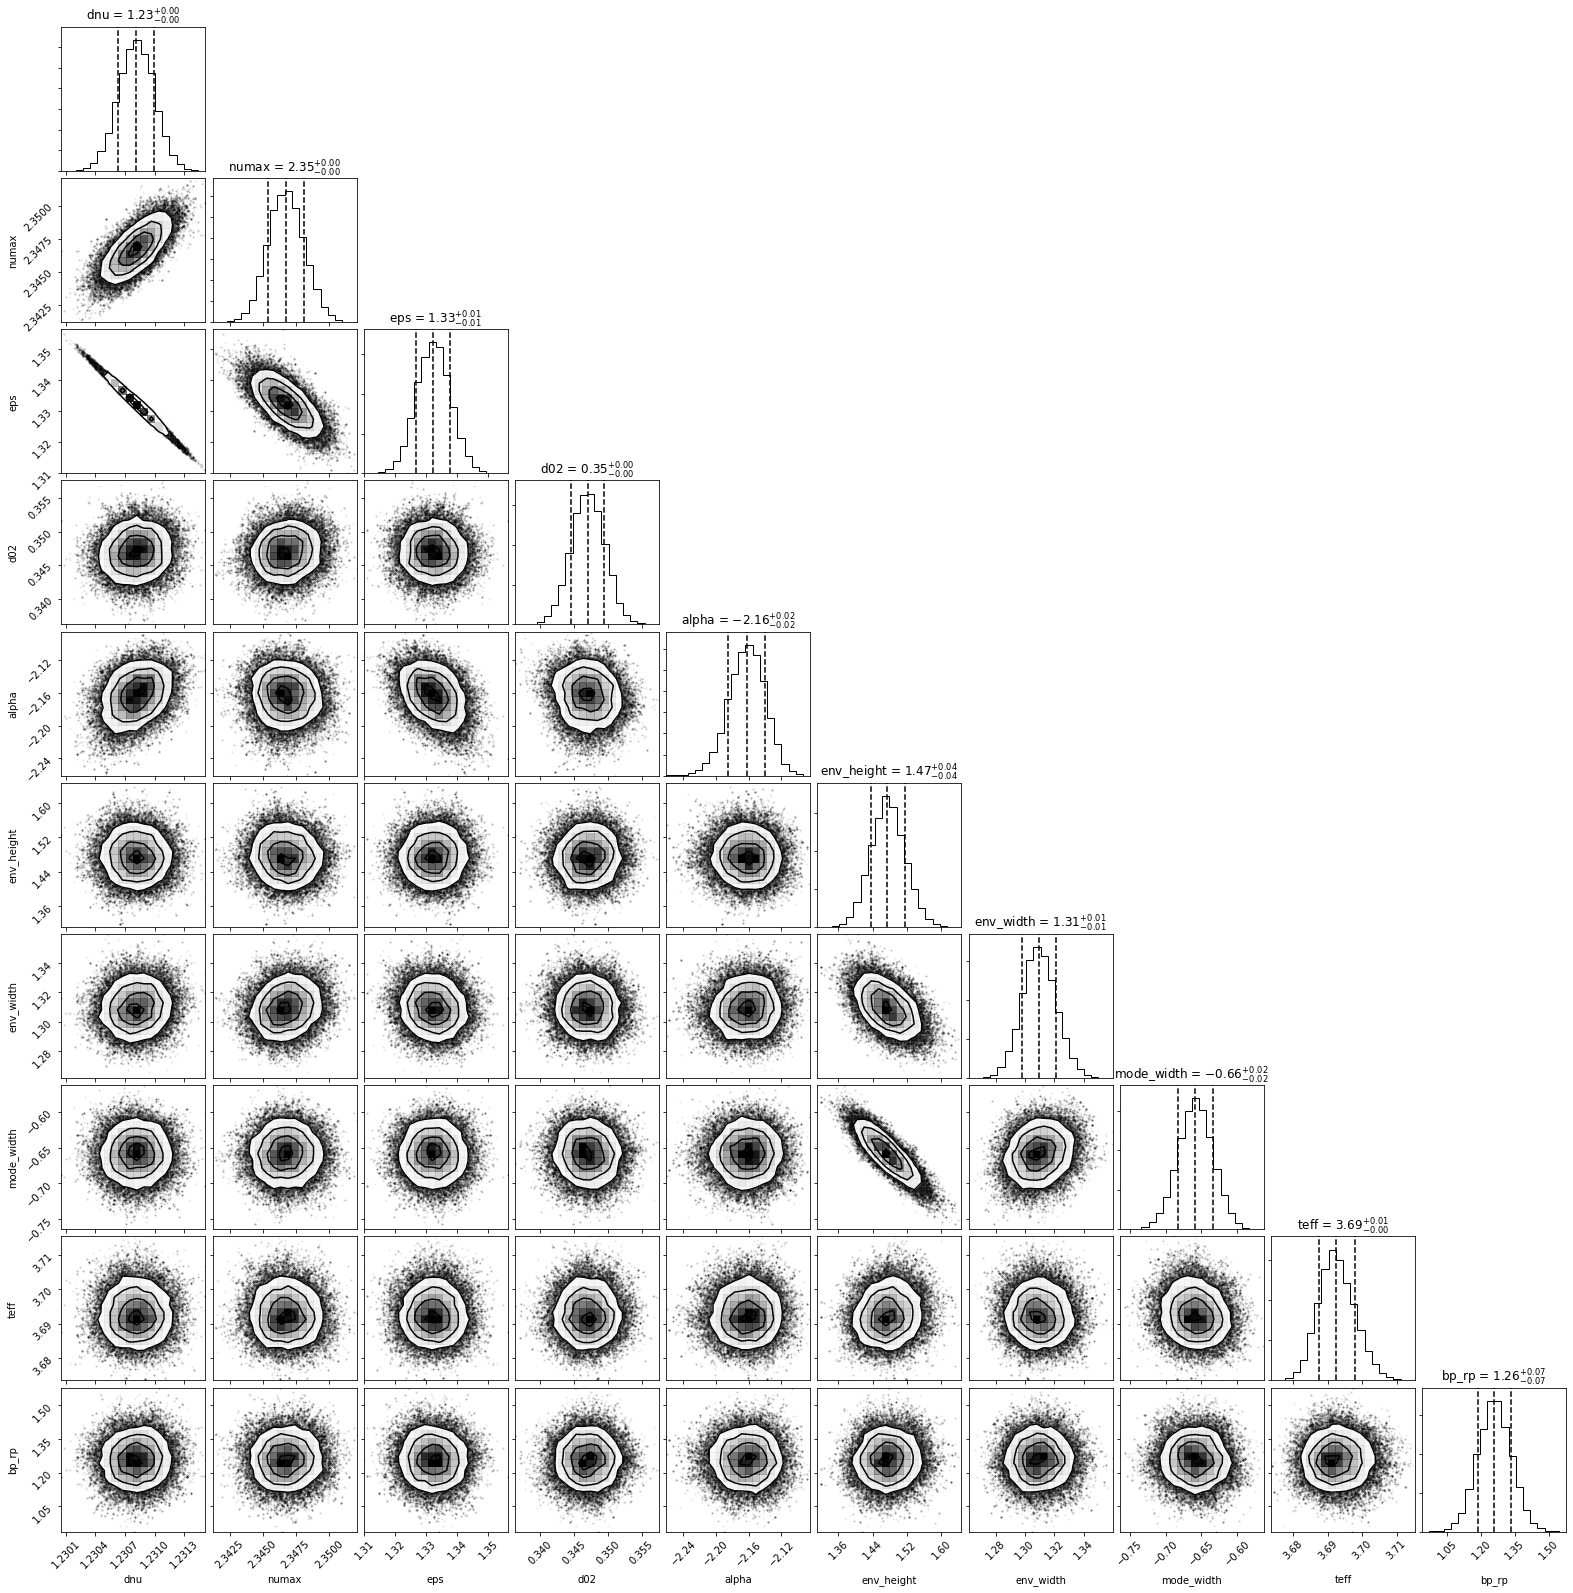

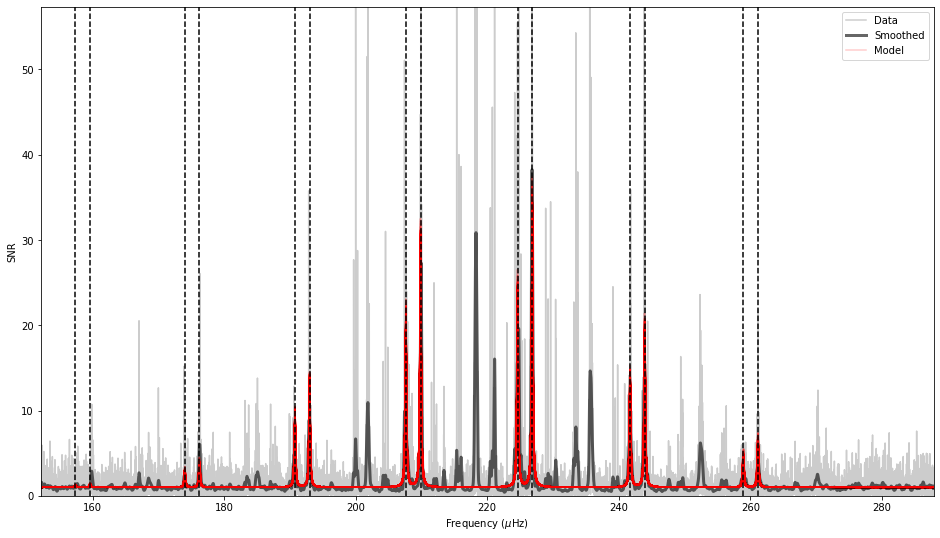

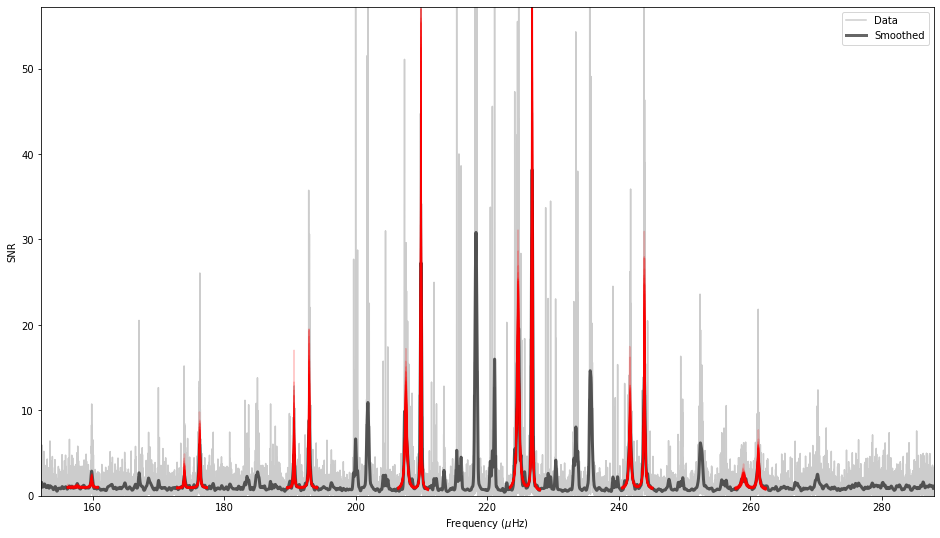

In [5]:
%%time
star()

/Users/davies/Library/Python/3.6/lib/python/site-packages/lightkurve/seismology/core.py:171: LightkurveWarning: You have passed both a numax and a frequency limit. The frequency limit will override the numax input.
  LightkurveWarning)


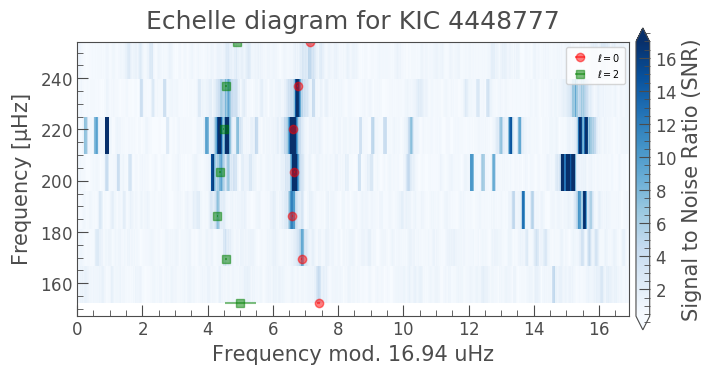

In [6]:
star.peakbag.plot_echelle(pg)